Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 1us/step
X train shape: (60000, 28, 28) Y train shape: (60000,)
X test shape: (10000, 28, 28) Y test shape: (10000,)
2
{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 28, 32)         3616      
_________________________________________________________________
activation_1 (Activation)    (None, 1, 28, 32)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 14, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 14, 64)         8256      
_________________________________________________________________
activation_2 (Activation)    (None, 1, 14, 64)         0         
__________

KeyboardInterrupt: 

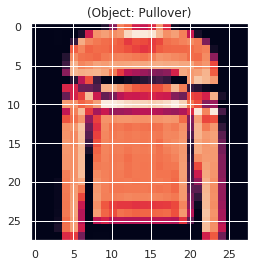

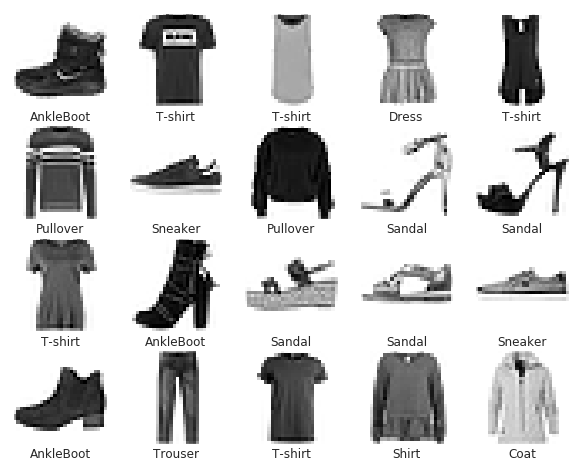

In [1]:
# 시간이 오래 걸린다. 

from keras.datasets import fashion_mnist

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(XTrain, YTrain), (XTest, YTest) = fashion_mnist.load_data()

print("X train shape:", XTrain.shape, "Y train shape:", YTrain.shape)
print("X test shape:", XTest.shape, "Y test shape:", YTest.shape)


plt.imshow(XTrain[5])

print(YTrain[5])

LabelData = {
 0: 'T-shirt',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'AnkleBoot',
}

plt.imshow(XTrain[5])
plt.title("(Object: " + str(LabelData[YTrain[5]]) + ")")

import numpy as np
unique, counts = np.unique(YTrain, return_counts=True)
dict(zip(unique, counts))

unique, counts = np.unique(YTest, return_counts=True)
print (dict(zip(unique, counts)))

XTrain = XTrain / 255.0
XTest = XTest / 255.0

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(XTrain[i], cmap=plt.cm.binary)
    plt.xlabel(LabelData[YTrain[i]])

from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Flatten, Activation
from keras.layers import Dense, MaxPool2D, Conv2D
from keras.initializers import Constant

XTrain = XTrain.reshape(XTrain.shape[0], 1, 28, 28)
XTest = XTest.reshape(XTest.shape[0], 1, 28, 28)
YTrain = np_utils.to_categorical(YTrain, 10)
YTest = np_utils.to_categorical(YTest, 10)

CNNModel = Sequential()

CNNModel.add(Conv2D(32,kernel_size=(2, 2), 
        padding='same', 
        activation='relu',
        bias_initializer=Constant(0.02), 
        kernel_initializer='random_uniform', 
        input_shape=(1, 28, 28)
    )
)

CNNModel.add(Activation('relu'))

CNNModel.add(MaxPool2D(padding='same'))

CNNModel.add(Conv2D(64,kernel_size=(2, 2), 
        padding='same', 
        bias_initializer=Constant(0.02), 
        kernel_initializer='random_uniform'
    )
)

CNNModel.add(Activation('relu'))

CNNModel.add(MaxPool2D(padding='same'))

CNNModel.add(Flatten())

CNNModel.add(Dense(128,
        activation='relu',
        bias_initializer=Constant(0.02), 
        kernel_initializer='random_uniform',         
    )
)

CNNModel.add(Dense(10, activation='softmax'))
CNNModel.summary()

CNNModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
CNNModel.fit(XTrain, YTrain, epochs=1000,batch_size=32, verbose=1)

CNNModel.evaluate(XTest,YTest)

Scores = CNNModel.evaluate(XTest,YTest, verbose=1)
print('Test loss:', Scores[0])
print('Test accuracy:', Scores[1])
